<a href="https://colab.research.google.com/github/2022sp93048/ML-Assignment/blob/main/LinearRegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.93263707],
       [3.23263098]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best) # y_predict = x * thetha
y_predict

array([[ 3.93263707],
       [10.39789902]])

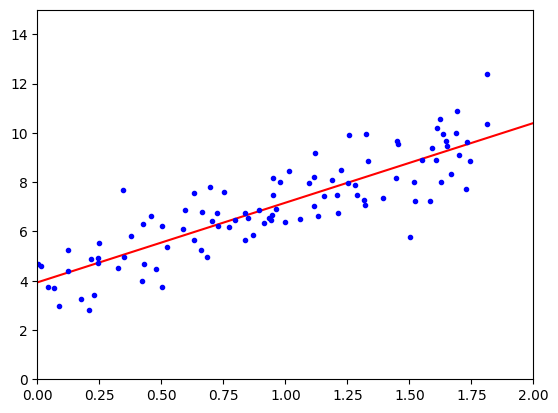

In [ ]:
from matplotlib import pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.93263707]), array([[3.23263098]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.93263707],
       [10.39789902]])

### Gradient Descent

In [ ]:
eta = 0.1 # learning rate
def gradient(eta = 0.1):
    n_iterations = 1000
    m = 100
    theta = np.random.randn(2,1) # random initialization
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        X_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
        plt.axis([0, 2, 0, 15])
    plt.show()

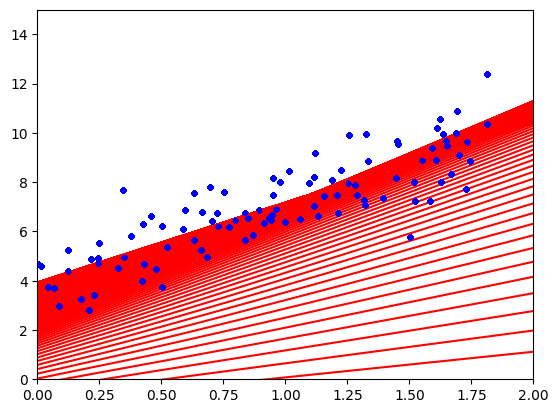

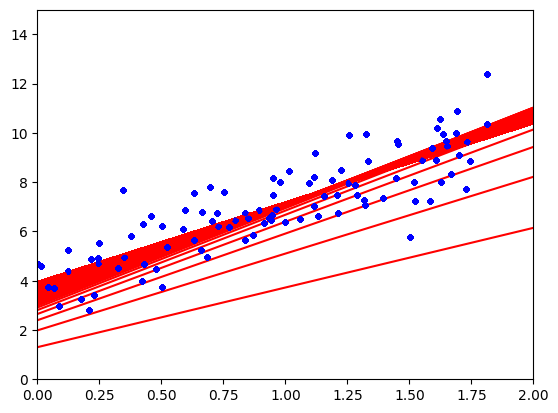

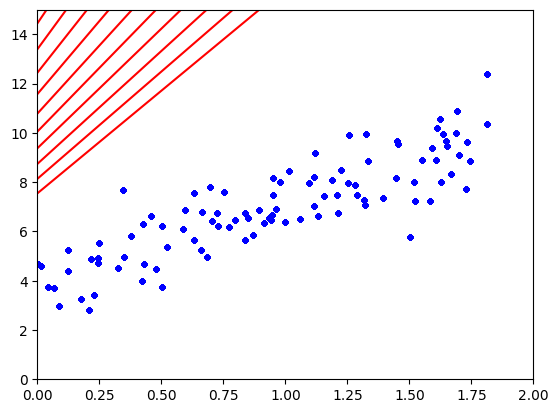

In [ ]:
eta_array = [0.02, 0.1, 0.5]
for eta in eta_array:
    gradient(eta)

### Stocahastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50
n = 1000
m = 100

In [ ]:
def learning_schedule(t):
    return t0 / (t + t1)

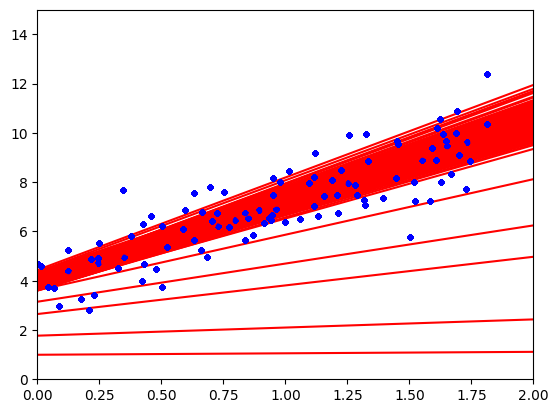

In [ ]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        X_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
        plt.axis([0, 2, 0, 15])

In [ ]:
theta

array([[3.86447301],
       [3.29316807]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99230564]), array([3.28856275]))

## Polynomial Regression

In [ ]:
m = 100
X= 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

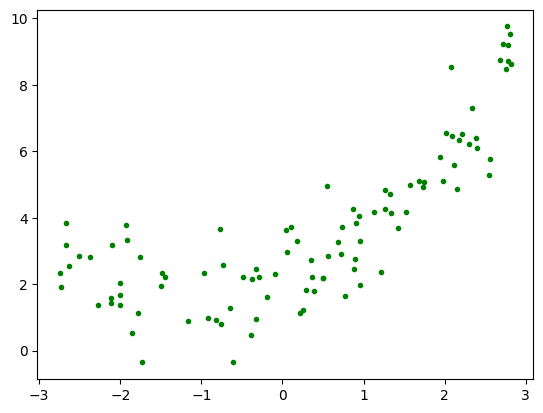

In [ ]:
plt.plot(X, y, "g." )
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [27]:
X_poly

array([[-3.82873521e-01,  1.46592133e-01],
       [ 2.11457868e+00,  4.47144301e+00],
       [-2.63697496e+00,  6.95363694e+00],
       [ 1.74512953e+00,  3.04547707e+00],
       [-2.00662722e+00,  4.02655278e+00],
       [ 1.97741911e+00,  3.91018632e+00],
       [ 1.34250829e+00,  1.80232852e+00],
       [-1.92499405e+00,  3.70560210e+00],
       [ 2.78253610e+00,  7.74250717e+00],
       [-1.73634741e+00,  3.01490234e+00],
       [-1.75127978e+00,  3.06698087e+00],
       [-3.81233299e-01,  1.45338828e-01],
       [ 5.60320396e-01,  3.13958946e-01],
       [-1.16613638e+00,  1.35987405e+00],
       [ 8.94308910e-01,  7.99788426e-01],
       [ 9.01641968e-01,  8.12958238e-01],
       [ 7.75244935e-01,  6.01004709e-01],
       [-2.67009834e+00,  7.12942515e+00],
       [-2.67460068e+00,  7.15348880e+00],
       [-6.04311097e-01,  3.65191902e-01],
       [ 2.21757627e+00,  4.91764450e+00],
       [ 1.73487441e+00,  3.00978921e+00],
       [ 2.80043840e+00,  7.84245526e+00],
       [-2.

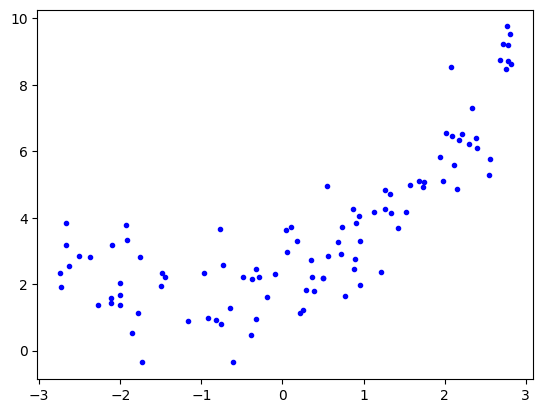

In [28]:
plt.plot(X, y, "b." )
# plt.show()
# plt.plot(X_poly[:,0], X_poly[:,1],"r-")
plt.show()

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04748054]), array([[0.97451296, 0.47216058]]))

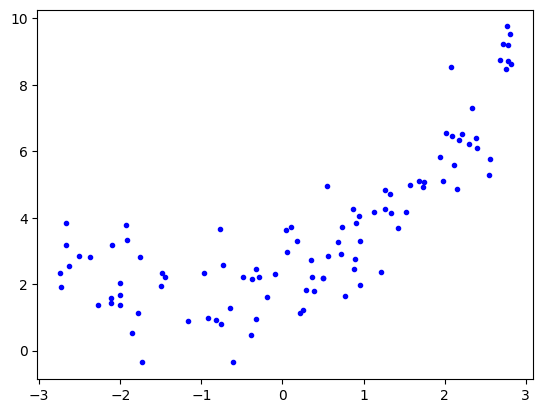

In [30]:
plt.plot(X, y, "b." )
# plt.show()
plt.plot(lin_reg.intercept_, lin_reg.coef_,"r-")
plt.show()